<a href="https://colab.research.google.com/github/pradeepkudupudi/IIITH/blob/main/image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 91ms/step - accuracy: 0.7431 - loss: 0.8127 - val_accuracy: 0.9798 - val_loss: 0.0709
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 88ms/step - accuracy: 0.9501 - loss: 0.1693 - val_accuracy: 0.9845 - val_loss: 0.0546
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 87ms/step - accuracy: 0.9633 - loss: 0.1261 - val_accuracy: 0.9877 - val_loss: 0.0451
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 88ms/step - accuracy: 0.9689 - loss: 0.1024 - val_accuracy: 0.9878 - val_loss: 0.0407
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 85ms/step - accuracy: 0.9736 - loss: 0.0883 - val_accuracy: 0.9892 - val_loss: 0.0435
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 87ms/step - accuracy: 0.9791 - loss: 0.0747 - val_accuracy: 0.9897 - val_loss: 0.0350
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 89ms/step - accuracy: 0.9816 - loss: 0.0628 - val_accuracy: 0.9900 - val_loss: 0.0370
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.9809 - loss: 0.0610 - 

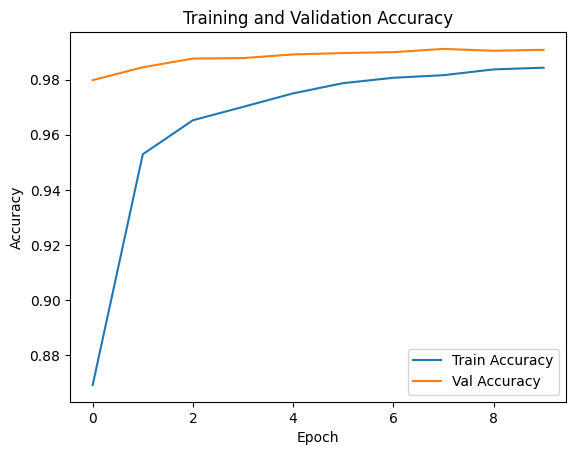

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the images (0-255 → 0-1) and reshape for CNN
X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Reduces overfitting
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_split=0.1)

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

# Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()
